In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
from offroad.utils import load_state
import json
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Quantify dataset

In [52]:
train_data_list = [
            dict(name='random', dir='data-20240124-161549', range=[10, 142]),
            dict(name='random', dir='data-20240124-162031', range=[10, 213]),
            dict(name='random', dir='data-20240124-163435', range=[10, 221]),
            dict(name='random', dir='data-20240124-164004', range=[10, 239]),
            dict(name='random', dir='data-20240124-164815', range=[10, 378]),
            dict(name='random', dir='data-20240124-165725', range=[10, 296]),
            dict(name='random', dir='data-20240124-170503', range=[10, 133]),
]

In [55]:
log_dir = '/Users/wenlixiao/Dropbox/School/Graduate/LeCAR/safe-learning-control/playground/offroad/data/'
num_random = 0
num_recover = 0
action_all = []
state_all = []
for train_data in train_data_list:
    with open(os.path.join(log_dir + train_data['dir'], 'header.json')) as f:
        header_info = json.load(f)
    t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir + train_data['dir'], train_data['range'], orientation_provider="ORIENTATION_PROVIDOER")
    obs_np = p_dict['obs']
    is_recover = controller_info['is_recover']
    obs_holder = []
    action_holder = []
    for i, obs in enumerate(obs_np):
        if is_recover[i] == False:
            obs_holder.append(obs)
            action_holder.append(action_list[i])
        elif len(obs_holder) > 0:
            is_clean = True
            traj = np.array(obs_holder)
            actions = np.array(action_holder)
            
            for j in range(traj.shape[0] - 1):
                if traj[j,0] == traj[j+1,0] and traj[j,1] == traj[j+1,1] and actions[j, 0] != 0:
                    # print(i,j)
                    is_clean = False
                    break
            if is_clean:
                state_all.append((traj, actions))
            obs_holder = []
            action_holder = []
            

2263


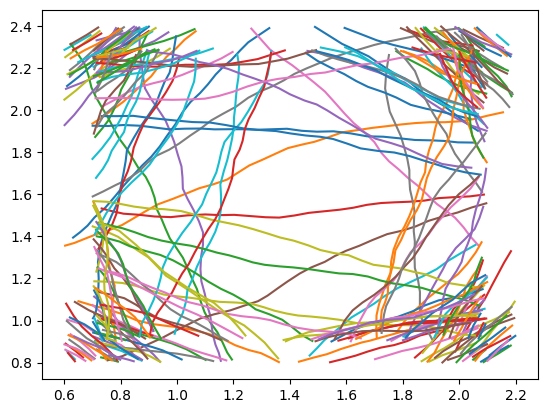

In [57]:
len_data = 0
obs_all = []
action_all = []
for traj, actions in state_all:
    len_data += len(traj)
    plt.plot(traj[:,0],traj[:,1])
    obs_all += traj.tolist()
    action_all += actions.tolist()
print(len_data)

Text(0.5, 1.0, 'target vel count')

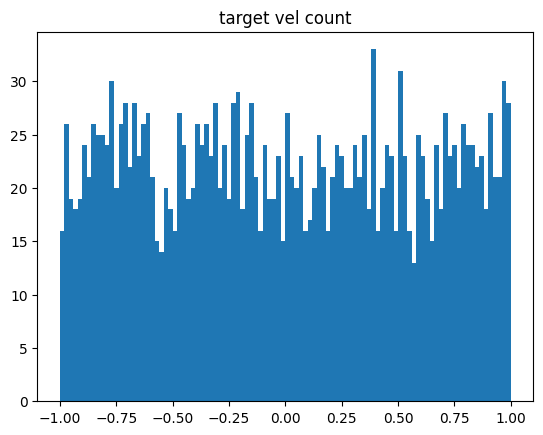

In [49]:
action_all = np.array(action_all)
obs_all = np.array(obs_all)
plt.hist(action_all[:, 1], bins=100)
# plt.yscale('log')
plt.title("target vel count")

In [15]:
log_dir = '/Users/wenlixiao/Dropbox/School/Graduate/LeCAR/safe-learning-control/playground/offroad/data/'
num_random = 0
num_recover = 0
action_all = []
obs_all = []
for train_data in train_data_list:
    with open(os.path.join(log_dir + train_data['dir'], 'header.json')) as f:
        header_info = json.load(f)
    t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir + train_data['dir'], train_data['range'], orientation_provider="ORIENTATION_PROVIDOER")
    obs_np = p_dict['obs']
    obs_np_1 = obs_np + .0
    targets = controller_info['targets']
    is_recover = controller_info['is_recover']
    num_recover += np.count_nonzero(is_recover)
    num_random += len(is_recover) - np.count_nonzero(is_recover)
    action_all += action_list.tolist()
    obs_all += obs_np.tolist()
    # plt.figure()
    # plt.plot(obs_np[:, 0], obs_np[:, 1])
    # plt.title("collected random dataset")
    # plt.xlim([-1, 4])
    # plt.ylim([-1, 4])
    # plt.plot(obs_np[:, 0])
    # plt.plot(obs_np[:, 1])
    for i in range(obs_np.shape[0] - 1):
        if obs_np[i, 0] == obs_np[i+1, 0] and  obs_np[i, 1] == obs_np[i+1, 1]:
            print(i, action_list[i])
# print(num_recover, num_random)
action_all = np.array(action_all)
obs_all = np.array(obs_all)

31 [0.07644306 0.99662051]
61 [ 0.1 -1. ]
127 [ 0.06 -1.  ]
179 [ 0.1 -1. ]
180 [ 0.1 -1. ]
181 [ 0.1 -1. ]
182 [ 0.1 -1. ]
663 [ 0.1 -1. ]
911 [ 0.1 -1. ]
1014 [ 0.1 -1. ]
1032 [ 0.1 -1. ]
1056 [ 0.1 -1. ]
1057 [0.1 1. ]
1058 [0.1 1. ]
1059 [0.1 1. ]
1060 [0.1 1. ]
1061 [0.1 1. ]
1062 [0.1 1. ]
1063 [0.1 1. ]
1066 [ 0.1 -1. ]
1286 [0.1 1. ]
1287 [ 0.1 -1. ]
1288 [ 0.1 -1. ]
1289 [ 0.1 -1. ]
1290 [ 0.1 -1. ]
1291 [ 0.1 -1. ]
1292 [ 0.1 -1. ]
1293 [ 0.1 -1. ]
1294 [ 0.1 -1. ]
1295 [ 0.1 -1. ]
1296 [ 0.1 -1. ]
1297 [ 0.1 -1. ]
1298 [ 0.1 -1. ]
1299 [ 0.1 -1. ]
1300 [ 0.1 -1. ]
1301 [ 0.1 -1. ]
1302 [ 0.1 -1. ]
1303 [ 0.1 -1. ]
1304 [ 0.1 -1. ]
1305 [ 0.1 -1. ]
1306 [ 0.1 -1. ]
1307 [ 0.1 -1. ]
1308 [ 0.1 -1. ]
1309 [ 0.1 -1. ]
1310 [ 0.1 -1. ]
1311 [ 0.1 -1. ]
1312 [ 0.1 -1. ]
1313 [ 0.1 -1. ]
1314 [ 0.1 -1. ]
1315 [ 0.1 -1. ]
1316 [ 0.1 -1. ]
1317 [ 0.1 -1. ]
1318 [ 0.1 -1. ]


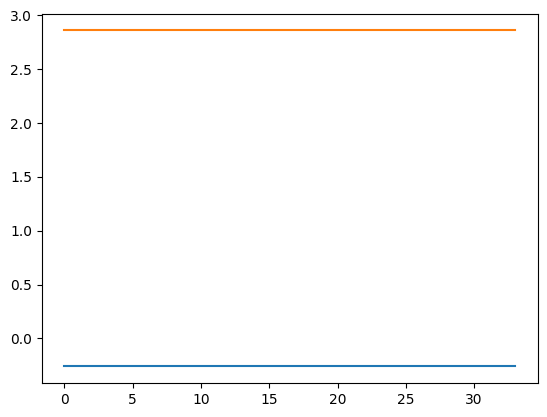

In [16]:
plt.plot(obs_np[1286:, :2])


Text(0.5, 1.0, 'target vel count')

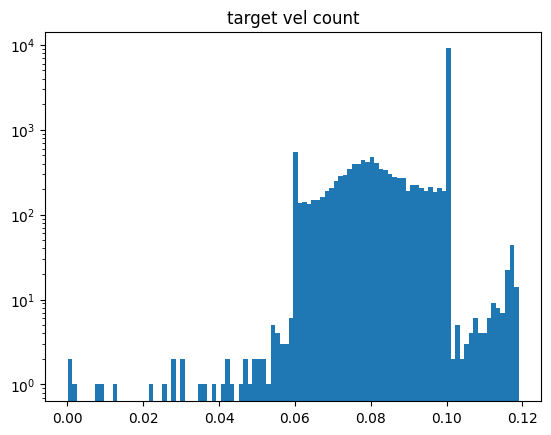

In [4]:
plt.hist(action_all[:, 0], bins=100)
plt.yscale('log')
plt.title("target vel count")

Text(0.5, 1.0, 'target steering count')

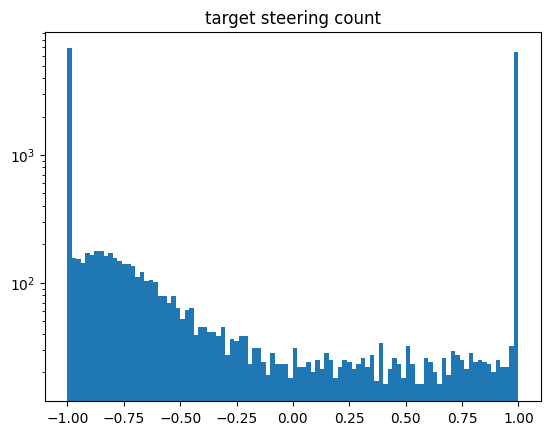

In [5]:
plt.hist(action_all[:, 1], bins=100)
plt.yscale('log')
plt.title("target steering count")

Text(0.5, 1.0, 'pos count')

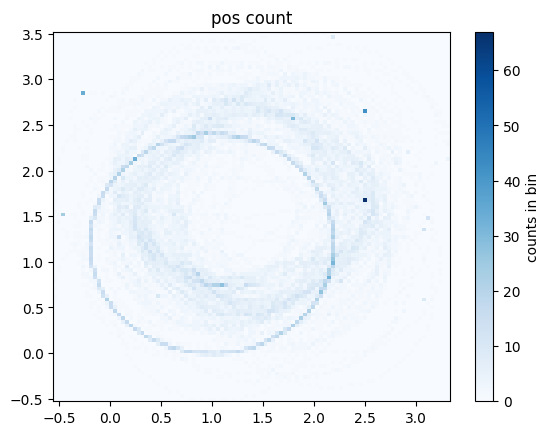

In [6]:
plt.hist2d(obs_all[:,0], obs_all[:,1], bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.title("pos count")